# Statistics Workshop

#### The data
The data set for the workshop is taken from the 2016 USA births data set. It has been chosen because it is suitable for applying the skills you are learning throughout this module, and these skills are transferable to many different data sets. However, this data set also represents humans at a vulnerable and emotional moment in their lives. It has been chosen to remind you that choices you make and conclusions you draw in data analysis can impact on real people, and can contain biases that affect both groups and individuals.

For some people, childbirth is a sensitive and emotive topic. Please be aware of this in the discussions that you have. If you are affected by issues raised in this data set or workshop, or if you are concerned about your wellbeing, talk to your mentor or contact our safeguarding team at `safeguarding@decoded.com`. If you would prefer not to participate in the workshop, let your mentor know. There is an alternative data set and completed notebook available.

## Your Brief
You are part of a team of social researchers who have been asked to provide information and advice for policy makers. You have been asked to investigate some questions using a sample from the 2016 USA births data set in more depth.

You'll need to select the relevant variables and data, calculate descriptive statistics and create visualisations to investigate the questions. In each case, think about what conclusions you can draw from your data. How sure can you be? Are there any ethical considerations?

## Questions to investigate
1. How much do most women weigh before they have their first baby? Are there any exceptions/anomalies?
   * Extension: Do women tend to weigh more or less at the beginning of subsequent pregnancies?
2. Do smokers have smaller babies?
3. Are male and female babies different?
4. Are heavier women taller?
5. Are married women more educated?
6. Are there any other insights you can take from the data?

#### Data dictionary
*Demographic data*
- `mother_age`: the age of the mother, in years
- `mother_race6`: the mother's race (1 = White (only), 2 = Black (only), 3 = AIAN (only) (American Indian or Alaskan Native), 4 = Asian (only), 5 = NHOPI (only) (Native Hawaiian or Other Pacific Islander), 6 = More than one race)
- `martial_status`: the mother's marital status (1 = married, 2 = unmarried)
- `mother_edu`: the mother's education level (1 = 8th grade or less, 2 = 9th through 12th grade with no diploma, 3 = High school graduate or GED completed, 5 = Some college credit, but not a degree, 5 = Associate degree (AA,AS), 6 = Bachelor’s degree (BA, AB, BS), 7= Master’s degree (MA, MS, MEng, MEd, MSW, MBA), 8 = Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD), 9 = Unknown)

*Medical data*
- `birth_order_num`: the birth order of the baby (1 = first child, 2 = second child and so on)
- `prenatal_visits`: the number of prenatal visits the mother had
- `smoker`: whether or not the mother smoked any cigarettes during pregnancy (N for no, Y for yes)
- `mother_height`: the mother's height, in inches
- `mother_BMI`: the mother's pre-pregnancy body mass index
- `mother_pre_weight`: the mother's pre-pregnancy weight, in pounds

*Baby data*
- `infant_sex`: the sex of the baby (M for male, F for female)
- `gest_weeks`: the length of the pregnancy, in weeks
- `birth_weight_g`: the weight of the baby, in grams

Let's get going!

In [28]:
import pandas as pd
import scipy
import seaborn as sns

In [90]:
df = pd.read_csv("births_2016.csv")
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729372 entries, 0 to 3729371
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   mother_age         float64
 1   mother_race6       float64
 2   marital_status     float64
 3   mother_edu         float64
 4   birth_order_num    float64
 5   smoker             object 
 6   mother_height      float64
 7   mother_BMI         float64
 8   mother_pre_weight  float64
 9   infant_sex         object 
 10  gest_weeks         float64
 11  birth_weight_g     float64
dtypes: float64(10), object(2)
memory usage: 640.2 MB


In [91]:
df = pd.read_csv("births_2016.csv").sample(1_000_000).reset_index(drop=True)
df.shape

(1000000, 12)

In [92]:
df.head()

,mother_age,mother_race6,marital_status,mother_edu,birth_order_num,smoker,mother_height,mother_BMI,mother_pre_weight,infant_sex,gest_weeks,birth_weight_g
0,28.0,1.0,1.0,3.0,4.0,N,52.0,37.2,143.0,M,40.0,3475.0
1,27.0,1.0,1.0,6.0,1.0,N,64.0,18.5,108.0,M,40.0,3045.0
2,21.0,1.0,2.0,3.0,2.0,Y,65.0,26.6,160.0,F,41.0,3230.0
3,23.0,1.0,2.0,3.0,2.0,N,65.0,17.3,104.0,F,37.0,3090.0
4,26.0,1.0,1.0,6.0,2.0,N,64.0,26.4,154.0,F,39.0,3930.0


In [38]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   mother_age         1000000 non-null  float64
 1   mother_race6       1000000 non-null  float64
 2   marital_status     1000000 non-null  float64
 3   mother_edu         1000000 non-null  float64
 4   birth_order_num    1000000 non-null  float64
 5   smoker             1000000 non-null  object 
 6   mother_height      1000000 non-null  float64
 7   mother_BMI         1000000 non-null  float64
 8   mother_pre_weight  1000000 non-null  float64
 9   infant_sex         1000000 non-null  object 
 10  gest_weeks         1000000 non-null  float64
 11  birth_weight_g     1000000 non-null  float64
dtypes: float64(10), object(2)
memory usage: 171.7 MB


How much do most women weigh before they have their first baby? Are there any exceptions/anomalies?

In [42]:
df['birth_order_num'] == 1

0          True
1         False
2         False
3         False
4          True
          ...  
999995     True
999996    False
999997    False
999998     True
999999    False
Name: birth_order_num, Length: 1000000, dtype: bool

In [40]:
# Filter for first-time mothers
first_time_mothers = df[df['birth_order_num'] == 1]

In [41]:
first_time_mothers.head()

,mother_age,mother_race6,marital_status,mother_edu,birth_order_num,smoker,mother_height,mother_BMI,mother_pre_weight,infant_sex,gest_weeks,birth_weight_g
0,32.0,1.0,1.0,2.0,1.0,N,64.0,23.2,135.0,F,41.0,3827.0
4,20.0,1.0,1.0,3.0,1.0,N,64.0,25.9,151.0,M,38.0,3856.0
10,27.0,1.0,1.0,5.0,1.0,N,67.0,26.6,170.0,F,40.0,2863.0
11,18.0,1.0,2.0,2.0,1.0,N,61.0,27.4,145.0,M,34.0,3540.0
15,21.0,1.0,1.0,3.0,1.0,N,63.0,30.1,170.0,F,36.0,2835.0


In [ ]:
# Calculate mean and median pre-pregnancy weight

In [43]:
mean_weight = first_time_mothers['mother_pre_weight'].mean()
median_weight = first_time_mothers['mother_pre_weight'].median()

In [44]:
print(f"Mean pre-pregnancy weight for first-time mothers: {mean_weight:.2f} pounds")
print(f"Median pre-pregnancy weight for first-time mothers: {median_weight:.2f} pounds")

Mean pre-pregnancy weight for first-time mothers: 152.35 pounds
Median pre-pregnancy weight for first-time mothers: 143.00 pounds


=AVERAGE(A1:A1000000)

In [45]:
# Identify potential anomalies (e.g., weights outside 3 standard deviations)
std = first_time_mothers['mother_pre_weight'].std()
std

np.float64(39.94455549482691)

In [47]:
39.9 - 152.35

-112.44999999999999

In [48]:
threshold = 3 * std
anomalies = first_time_mothers[
    (first_time_mothers['mother_pre_weight'] < mean_weight - threshold) 
  | (first_time_mothers['mother_pre_weight'] > mean_weight + threshold)
]

print(f"Number of anomalies: {len(anomalies)}")

Number of anomalies: 4585


What is the average birth weight of babies for each gestational week?

In [49]:
df.groupby('gest_weeks')['birth_weight_g'].mean()

gest_weeks
17.0     466.500000
18.0     403.404255
19.0     356.500000
20.0     411.995968
21.0     477.887574
22.0     556.261176
23.0     633.707593
24.0     882.009249
25.0     950.683838
26.0    1076.326938
27.0    1179.028337
28.0    1588.982682
29.0    1718.762320
30.0    1914.852892
31.0    2065.367019
32.0    2187.869376
33.0    2362.461356
34.0    2505.790393
35.0    2709.319326
36.0    2874.081924
37.0    3053.059909
38.0    3246.318284
39.0    3400.921331
40.0    3478.616528
41.0    3528.586057
42.0    3457.942428
43.0    3429.308798
44.0    3414.831161
45.0    3399.436139
46.0    3364.566667
47.0    3373.837820
Name: birth_weight_g, dtype: float64

Do smokers have smaller babies?

In [53]:
(df['smoker'] == 'Y').sum() / 1_000_000 * 100

np.float64(7.145899999999999)

In [56]:
# Compare birth weights of smokers and non-smokers
smokers = df[df['smoker'] == 'Y']['birth_weight_g']

In [57]:
smokers2 = df.loc[df['smoker'] == 'Y', 'birth_weight_g']

In [59]:
(smokers == smokers2).sum()

np.int64(71459)

In [60]:
non_smokers = df[df['smoker'] == 'N']['birth_weight_g']

In [61]:
# Calculate mean birth weights
mean_smoker_weight = smokers.mean()
mean_non_smoker_weight = non_smokers.mean()

In [62]:
print(f"Mean birth weight for smokers' babies: {mean_smoker_weight:.2f} grams")
print(f"Mean birth weight for non-smokers' babies: {mean_non_smoker_weight:.2f} grams")

Mean birth weight for smokers' babies: 3090.38 grams
Mean birth weight for non-smokers' babies: 3287.80 grams


In [63]:
# Perform a t-test to check for significant difference
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(smokers, non_smokers, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: -87.18, P-value: 0.0000


Are male and female babies different in weight?

In [64]:
# Compare birth weights by sex
male_weights = df[df['infant_sex'] == 'M']['birth_weight_g']

In [67]:
df.columns[11]

'birth_weight_g'

In [69]:
df['infant_sex'] == 'M'

0         False
1         False
2          True
3         False
4          True
          ...  
999995     True
999996    False
999997     True
999998     True
999999    False
Name: infant_sex, Length: 1000000, dtype: bool

In [76]:
df.sample(15).iloc[0:5, 7:11]

,mother_BMI,mother_pre_weight,infant_sex,gest_weeks
902969,22.7,120.0,M,42.0
694066,29.5,172.0,M,37.0
300578,29.7,152.0,M,39.0
649762,26.7,151.0,M,37.0
176667,21.1,127.0,F,43.0


In [77]:
female_weights = df[df['infant_sex'] == 'F']['birth_weight_g']

# Calculate mean and median weights
mean_male = male_weights.mean()
mean_female = female_weights.mean()

In [78]:
print(f"Mean weight for males: {mean_male:.2f} grams")
print(f"Mean weight for females: {mean_female:.2f} grams")

Mean weight for males: 3330.59 grams
Mean weight for females: 3214.21 grams


In [79]:
# Perform a t-test
t_stat, p_value = ttest_ind(male_weights, female_weights, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: 99.85, P-value: 0.0000



    Is there a correlation between mother's age and gestational weeks?


<Axes: xlabel='mother_age', ylabel='gest_weeks'>

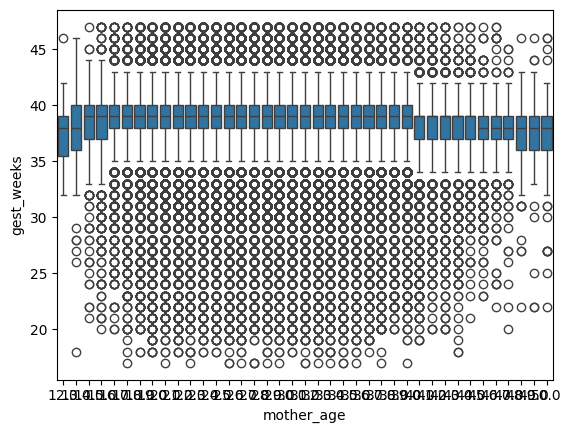

In [80]:
df['gest_weeks'].corr(df['mother_age'])
sns.boxplot(data=df, x='mother_age', y='gest_weeks')


    How does birth weight vary by birth order?


In [103]:
num_of_babies = sorted(df.birth_order_num.unique().tolist())
num_of_babies

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [105]:
f"Here is a string with a sum {2*10} in it. Here is the list of babies {num_of_babies}"

'Here is a string with a sum 20 in it. Here is the list of babies [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]'

In [107]:
df[df['birth_order_num'] == 1.0]['birth_weight_g'].to_list()

[3045.0,
 3025.0,
 2845.0,
 2205.0,
 2260.0,
 3685.0,
 3340.0,
 2725.0,
 3620.0,
 2917.0,
 3713.0,
 2580.0,
 3005.0,
 3317.0,
 3350.0,
 3230.0,
 3101.0,
 2700.0,
 4082.0,
 2920.0,
 3797.0,
 3888.0,
 3830.0,
 2430.0,
 1515.0,
 3140.0,
 3080.0,
 3739.0,
 3289.0,
 3175.0,
 3420.0,
 3118.0,
 3373.0,
 3164.0,
 2850.0,
 3020.0,
 3714.0,
 3040.0,
 3062.0,
 3119.0,
 3025.0,
 2667.0,
 3060.0,
 3270.0,
 4010.0,
 3325.0,
 3543.0,
 3289.0,
 3190.0,
 3459.0,
 4111.0,
 3450.0,
 2958.0,
 3450.0,
 3686.0,
 2778.0,
 3317.0,
 3770.0,
 2778.0,
 3334.0,
 4080.0,
 2710.0,
 2780.0,
 3204.0,
 1830.0,
 3580.0,
 3345.0,
 3686.0,
 3565.0,
 3065.0,
 4220.0,
 2409.0,
 3165.0,
 3270.0,
 4026.0,
 2637.0,
 3402.0,
 3572.0,
 4240.0,
 3496.0,
 2354.0,
 3104.0,
 2523.0,
 3260.0,
 4126.0,
 3320.0,
 2460.0,
 3781.0,
 3515.0,
 2840.0,
 2863.0,
 2999.0,
 3345.0,
 2390.0,
 3665.0,
 3175.0,
 2770.0,
 4065.0,
 3104.0,
 3800.0,
 3785.0,
 3317.0,
 4050.0,
 3211.0,
 2765.0,
 3405.0,
 3146.0,
 3912.0,
 3459.0,
 3203.0,
 1150.0,
 

In [108]:
baby_num_and_weights = {}
for baby in num_of_babies:
    temp_df = df[df['birth_order_num'] == baby]['birth_weight_g'].to_list()
    baby_num_and_weights[f"Baby {int(baby)}"] = temp_df

In [ ]:
baby_num_and_weights

In [ ]:
df.groupby('birth_order_num')['birth_weight_g'].head()

In [ ]:
sns.boxplot(data=df, x='birth_order_num', y='birth_weight_g')

<Axes: xlabel='birth_order_num', ylabel='birth_weight_g'>

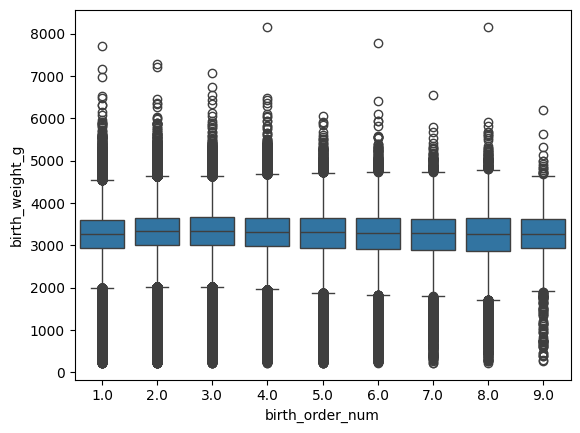

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

# Generate sample data for 10 categories
np.random.seed(42)
data = {
    f"# of babies {i+1}": np.random.normal(loc=i, scale=1, size=100) for i in range(9)
}
data

In [111]:
# Convert to DataFrame
df = pd.DataFrame(baby_num_and_weights)

# Create the ridgeline plot
plt.figure(figsize=(12, 8))
joyplot(
    data=df,
    colormap=plt.cm.viridis,
    labels=[f"Category {i+1}" for i in range(9)],
    title="Ridgeline Chart for 10 Categories"
)

plt.show()

ValueError: All arrays must be of the same length


    What's the average BMI by education level?


In [ ]:
df.groupby('mother_edu')['mother_BMI'].mean().sort_values()


    Do taller mothers have longer gestational periods?


In [ ]:
df['gest_weeks'].corr(df['mother_height'])
sns.scatterplot(data=df, x='mother_height', y='gest_weeks')


    Is there a relationship between marital status and smoking behavior?


In [ ]:
pd.crosstab(df['marital_status'], df['smoker'])


    How does birth weight differ between smokers and non-smokers for each infant sex?


In [ ]:
df.groupby(['smoker', 'infant_sex'])['birth_weight_g'].mean()


    What's the age distribution of mothers by race?


In [ ]:
sns.boxplot(data=df, x='mother_race6', y='mother_age')


    Is there a correlation between mother's pre-pregnancy weight and baby's birth weight?


In [ ]:
df['birth_weight_g'].corr(df['mother_pre_weight'])
sns.scatterplot(data=df, x='mother_pre_weight', y='birth_weight_g')


    How does BMI vary by marital status?


In [ ]:
df.groupby('marital_status')['mother_BMI'].describe()
sns.boxplot(data=df, x='marital_status', y='mother_BMI')


    What's the relationship between mother's education and age?


In [ ]:
sns.boxplot(data=df, x='mother_edu', y='mother_age')


    Do first-time mothers tend to be younger?


In [ ]:
df.groupby('birth_order_num')['mother_age'].mean()


    Is there a difference in gestational weeks between smokers and non-smokers?


In [ ]:
df.groupby('smoker')['gest_weeks'].describe()


    How does height distribution vary by race?


In [ ]:
sns.boxplot(data=df, x='mother_race6', y='mother_height')